In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan = pd.read_csv('train.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv('test.csv')

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


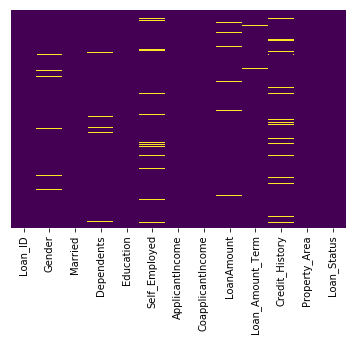

In [6]:
sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')

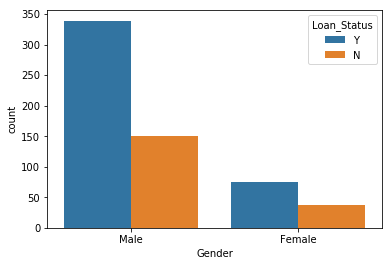

In [7]:
sns.countplot(x= 'Gender', hue= 'Loan_Status',data= loan)

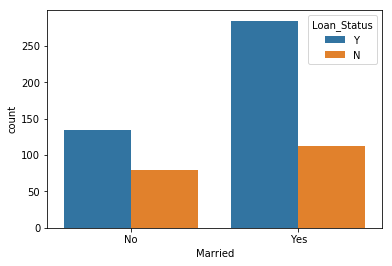

In [8]:
sns.countplot(x= 'Married', hue= 'Loan_Status',data= loan)

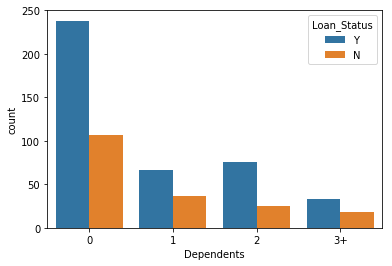

In [9]:
sns.countplot(x= 'Dependents', hue= 'Loan_Status',data= loan)

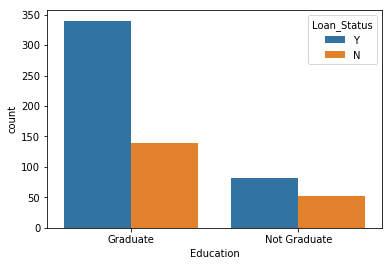

In [10]:
sns.countplot(x= 'Education', hue= 'Loan_Status',data= loan)

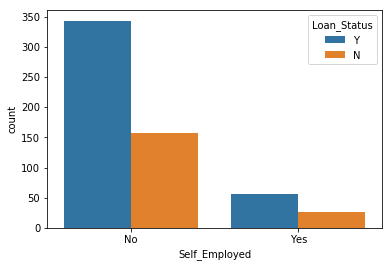

In [11]:
sns.countplot(x= 'Self_Employed', hue= 'Loan_Status',data= loan)

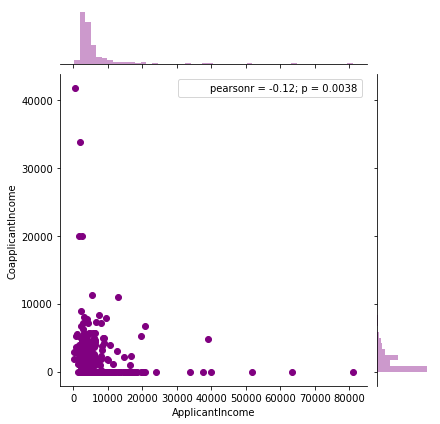

In [12]:
sns.jointplot('ApplicantIncome', 'CoapplicantIncome', data= loan, color= 'purple')

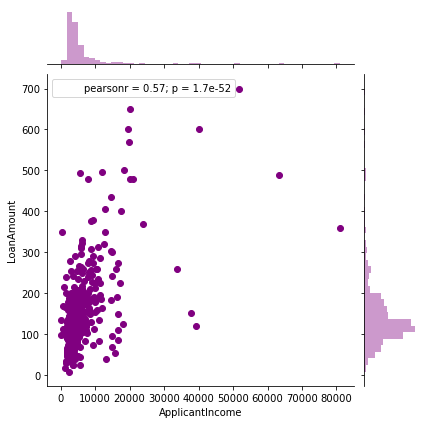

In [13]:
sns.jointplot('ApplicantIncome', 'LoanAmount', data= loan, color= 'purple')

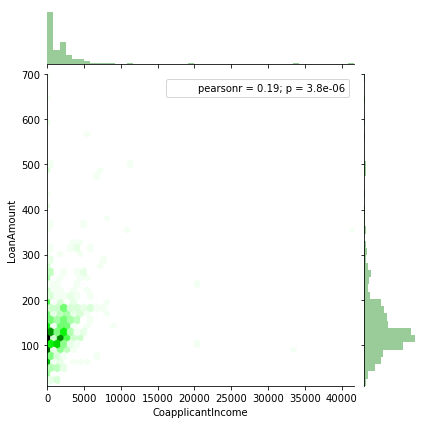

In [14]:
sns.jointplot('CoapplicantIncome', 'LoanAmount', data= loan, color= 'green', kind= 'hex')

In [15]:
loan['Total_Income'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']

In [16]:
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

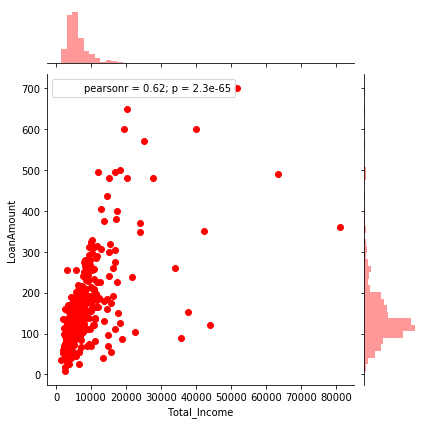

In [17]:
sns.jointplot('Total_Income', 'LoanAmount', data= loan, color= 'red')

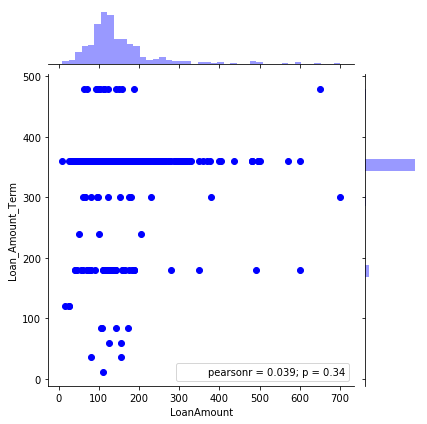

In [18]:
sns.jointplot('LoanAmount', 'Loan_Amount_Term', kind= 'scatter', data= loan, color= 'blue')

In [19]:
loan_status = pd.get_dummies(loan['Loan_Status'])
loan = pd.concat([loan,loan_status['Y']], axis=1)
loan.drop('Loan_Status', axis=1, inplace= True)

In [20]:
loan.rename(columns={'Y': 'Loan_Status'},inplace= True)
loan.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,5849.0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,6091.0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,3000.0,1


In [21]:
education = pd.get_dummies(loan['Education'])
loan = pd.concat([loan,education['Graduate']], axis=1)

In [22]:
education2 = pd.get_dummies(test['Education'])
test = pd.concat([test,education2['Graduate']], axis=1)

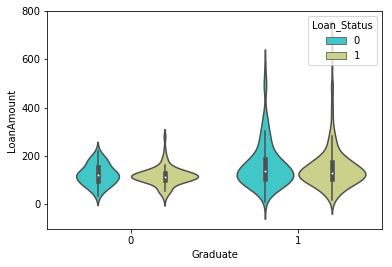

In [23]:
sns.violinplot(x= 'Graduate', y= 'LoanAmount', hue= 'Loan_Status', data= loan, palette= 'rainbow')

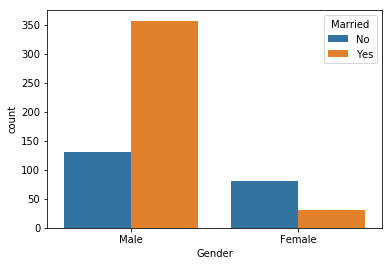

In [24]:
sns.countplot(x= 'Gender', hue= 'Married', data= loan)

In [25]:
married1 = pd.get_dummies(loan['Married'], drop_first=True)
loan = pd.concat([loan,married1], axis=1)

In [26]:
loan.rename(columns={'Yes': 'married'}, inplace=True)

In [27]:
married2 = pd.get_dummies(test['Married'], drop_first=True)
test = pd.concat([test,married2], axis=1)
test.rename(columns={'Yes': 'married'}, inplace=True)

In [28]:
def gender(cols):
    
    Gender = cols[0]
    Married = cols[1]
    
    if pd.isnull(Gender):
        
        if Married == 'Yes':
            return 'Male'
        else:
            return 'Female'
    else:
        return Gender

In [29]:
loan['Gender'] = loan[['Gender', 'Married']].apply(gender, axis=1)

In [30]:
test['Gender'] = test[['Gender', 'Married']].apply(gender, axis=1)

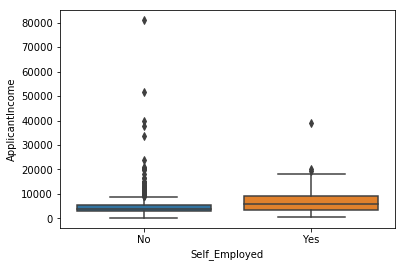

In [31]:
sns.boxplot(x= 'Self_Employed', y= 'ApplicantIncome', data= loan)

In [32]:
def employed(cols):
    
    Income = cols[0]
    employ = cols[1]
    
    if pd.isnull(employ):
        
        if Income > 20000:
            return 'No'
        elif Income < 5000:
            return 'No'
        else:
            return 'Yes'
    else:
        employ

In [33]:
loan['Self_Employed'] = loan[['ApplicantIncome', 'Self_Employed']].apply(employed, axis=1)

In [34]:
test['Self_Employed'] = test[['ApplicantIncome', 'Self_Employed']].apply(employed, axis=1)

In [35]:
employed = pd.get_dummies(loan['Self_Employed'], drop_first=True)
loan['Self_Employed'] = employed

In [36]:
employed2 = pd.get_dummies(test['Self_Employed'], drop_first=True)
test['Self_Employed'] = employed2

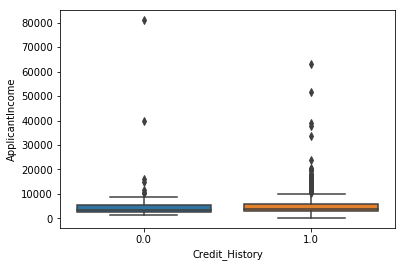

In [37]:
sns.boxplot(x= 'Credit_History', y= 'ApplicantIncome', data= loan)

In [38]:
def credit(cols):
    
    income = cols[0]
    history = cols[1]
    
    if pd.isnull(history):
        
        if income>2000 and income<10000:
            return 0.0
        else:
            return 1.0
    else:
        return history
        
loan['Credit_History'] = loan[['ApplicantIncome', 'Credit_History']].apply(credit, axis=1)

In [39]:
test['Credit_History'] = test[['ApplicantIncome', 'Credit_History']].apply(credit, axis=1)

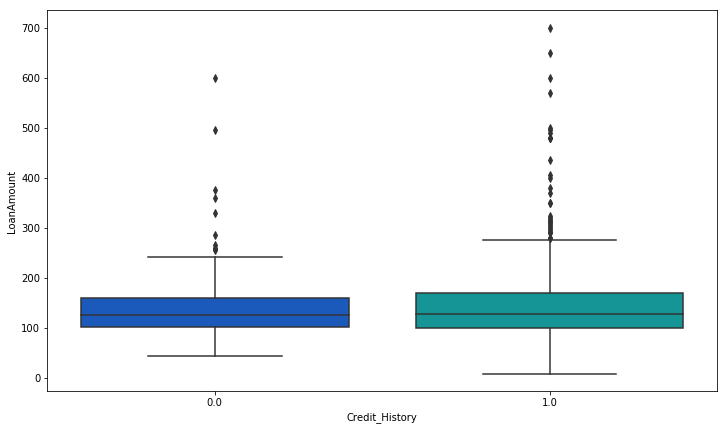

In [40]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Credit_History',y='LoanAmount',data= loan,palette='winter')

In [41]:
def loanA(cols):
    Amount = cols[0]
    Credit = cols[1]
    
    if pd.isnull(Amount):
        
        if Credit == 0.0:
            return 130.0
        else:
            return 140.0
    else:
        return Amount

In [42]:
loan['LoanAmount'] = loan[['LoanAmount', 'Credit_History']].apply(loanA, axis=1)

In [43]:
test['LoanAmount'] = test[['LoanAmount', 'Credit_History']].apply(loanA, axis=1)

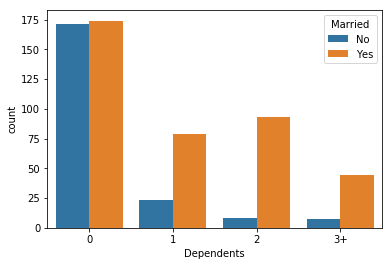

In [44]:
sns.countplot(x= 'Dependents', hue= 'Married', data = loan)

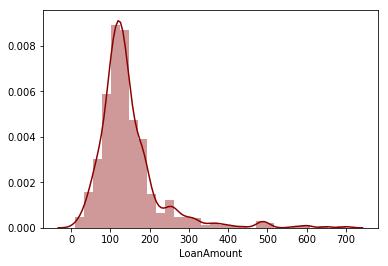

In [45]:
sns.distplot(loan['LoanAmount'],color='darkred',bins=30)

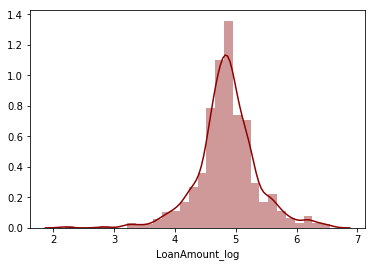

In [46]:
loan['LoanAmount_log'] = np.log(loan['LoanAmount'])
sns.distplot(loan['LoanAmount_log'],color='darkred',bins=30)

In [47]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

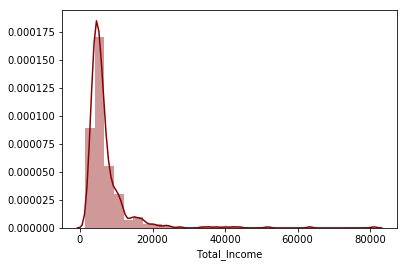

In [48]:
sns.distplot(loan['Total_Income'], color= 'darkred', bins= 30)

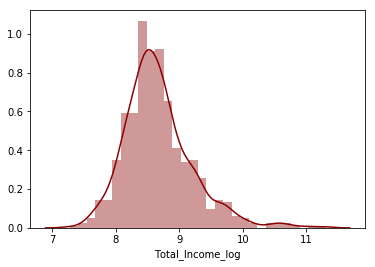

In [49]:
loan['Total_Income_log'] = np.log(loan['Total_Income'])
sns.distplot(loan['Total_Income_log'],color='darkred',bins=30)

In [50]:
test['Total_Income_log'] = np.log(test['Total_Income'])

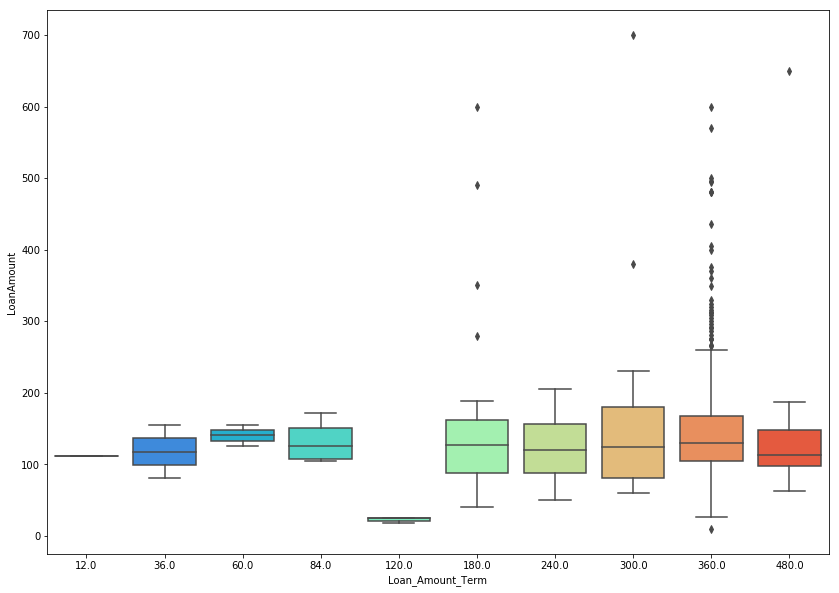

In [51]:
plt.figure(figsize=(14, 10))
sns.boxplot(x= 'Loan_Amount_Term', y= 'LoanAmount', data= loan, palette= 'rainbow')

In [52]:
loan['Loan_Amount_Term'].fillna(360.0, inplace= True)

In [53]:
test['Loan_Amount_Term'].fillna(360.0, inplace= True)

In [54]:
loan.dropna(inplace=True)

In [55]:
gender = pd.get_dummies(loan['Gender'], drop_first= True)
area = pd.get_dummies(loan['Property_Area'], drop_first= True)
dependents = pd.get_dummies(loan['Dependents'], drop_first= True)
loan = pd.concat([loan,gender,area,dependents], axis=1)
loan.drop(['Gender', 'Property_Area', 'Dependents', 'Loan_ID', 'Married', 'Education', 'ApplicantIncome',
           'CoapplicantIncome', 'Total_Income', 'LoanAmount'], axis=1, inplace= True)

In [56]:
gender2 = pd.get_dummies(test['Gender'], drop_first= True)
area2 = pd.get_dummies(test['Property_Area'], drop_first= True)
dependents2 = pd.get_dummies(test['Dependents'], drop_first= True)
test = pd.concat([test,gender2,area2,dependents2], axis=1)
test.drop(['Married', 'Education', 'ApplicantIncome','CoapplicantIncome', 'Total_Income', 'LoanAmount',
           'Gender', 'Property_Area', 'Dependents'], axis=1, inplace=True)

## Training The Model and Predictions

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(loan.drop('Loan_Status',axis=1), 
                                                    loan['Loan_Status'], test_size=0.20, 
                                                    random_state=101)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
LRmodel1 = LogisticRegression()
LRmodel1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
LRpred1 = LRmodel1.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [63]:
print(classification_report(y_test, LRpred1))
print(confusion_matrix(y_test, LRpred1))
print(accuracy_score(y_test, LRpred1))

             precision    recall  f1-score   support

          0       0.65      0.39      0.49        33
          1       0.80      0.92      0.86        87

avg / total       0.76      0.78      0.76       120

[[13 20]
 [ 7 80]]
0.775


In [64]:
from sklearn.naive_bayes import GaussianNB

nb1 = GaussianNB()
nb1.fit(X_train, y_train)
nbpred1= nb1.predict(X_test)

print(classification_report(y_test, nbpred1))
print(confusion_matrix(y_test, nbpred1))
print(accuracy_score(y_test, nbpred1))

             precision    recall  f1-score   support

          0       0.57      0.39      0.46        33
          1       0.79      0.89      0.84        87

avg / total       0.73      0.75      0.73       120

[[13 20]
 [10 77]]
0.75


In [65]:
from sklearn.ensemble import AdaBoostClassifier

ada1 = AdaBoostClassifier()

ada1.fit(X_train, y_train)

adapred1 = ada1.predict(X_test)

print(classification_report(y_test, adapred1))
print(confusion_matrix(y_test, adapred1))
print(accuracy_score(y_test, adapred1))

             precision    recall  f1-score   support

          0       0.61      0.33      0.43        33
          1       0.78      0.92      0.85        87

avg / total       0.74      0.76      0.73       120

[[11 22]
 [ 7 80]]
0.758333333333


In [77]:
loan.columns

Index(['Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Graduate', 'married', 'LoanAmount_log', 'Total_Income_log', 'Male',
       'Semiurban', 'Urban', '1', '2', '3+'],
      dtype='object')

In [78]:
train = loan[['Credit_History', 'LoanAmount_log', 'Total_Income_log', 'Self_Employed', 'Graduate', 'Loan_Status']]

In [79]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train.drop('Loan_Status',axis=1), 
                                                    train['Loan_Status'], test_size=0.25, 
                                                    random_state=101)

In [80]:
LRmodel1 = LogisticRegression()
LRmodel1.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
LRpred1 = LRmodel1.predict(X_test1)

print(classification_report(y_test1, LRpred1))
print(confusion_matrix(y_test1, LRpred1))
print(accuracy_score(y_test1, LRpred1))

             precision    recall  f1-score   support

          0       0.68      0.44      0.54        43
          1       0.80      0.92      0.86       107

avg / total       0.77      0.78      0.76       150

[[19 24]
 [ 9 98]]
0.78


In [86]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train1,y_train1)
    pred_i = knn.predict(X_test1)
    error_rate.append(np.mean(pred_i != y_test1))

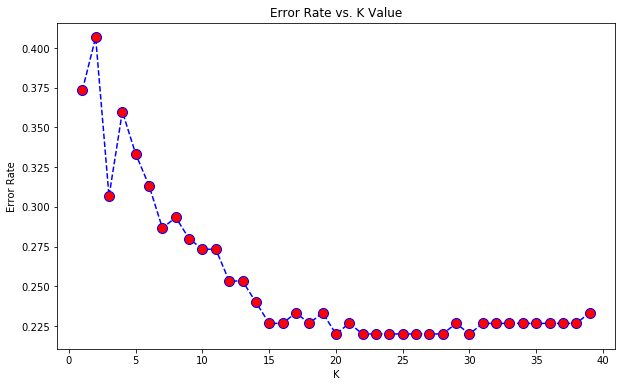

In [87]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [91]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train1, y_train1)
knnpred= knn.predict(X_test1)

print(classification_report(y_test1, knnpred))
print(confusion_matrix(y_test1, knnpred))
print(accuracy_score(y_test1, knnpred))

             precision    recall  f1-score   support

          0       0.68      0.44      0.54        43
          1       0.80      0.92      0.86       107

avg / total       0.77      0.78      0.76       150

[[19 24]
 [ 9 98]]
0.78


In [66]:
test_pred = LRmodel1.predict(test.drop('Loan_ID', axis=1))

In [69]:
Loan_Status = []
for i in test_pred:
    if i == 1:
        Loan_Status.append('Y')
    else:
        Loan_Status.append('N')

In [73]:
submission = pd.DataFrame(columns=['Loan_ID', 'Loan_Status'])
submission['Loan_ID'] = test['Loan_ID']
submission['Loan_Status'] = Loan_Status

In [76]:
submission.to_csv('Solution.csv', index=False)

In [92]:
testsol = test[['Credit_History', 'LoanAmount_log', 'Total_Income_log', 'Self_Employed', 'Graduate']]

In [93]:
test_pred1 = LRmodel1.predict(testsol)

In [98]:
Loan_Status1 = []
for i in test_pred1:
    if i == 1:
        Loan_Status1.append('Y')
    else:
        Loan_Status1.append('N')

In [100]:
submission = pd.DataFrame(columns=['Loan_ID', 'Loan_Status'])
submission['Loan_ID'] = test['Loan_ID']
submission['Loan_Status'] = Loan_Status1

In [101]:
submission.to_csv('Solution1.csv', index=False)